In [1]:
import numpy as np
from __future__ import print_function

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import PIL
import PIL.Image
from collections import namedtuple
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Image
from __future__ import print_function
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm

In [37]:
#画像を読み込み
img = PIL.Image.open("s_sa-val2.jpg")
#img = PIL.Image.open("color.jpg")

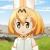

In [38]:
img

In [39]:
# 画像のサイズを取得
width, height = img.size

In [40]:
height, width

(50, 50)

In [41]:
# 特徴ベクトルを取得
# 色ベクトルと位置ベクトルを持った辞書を用意
v = []
color_dic = {}
for y in range(height):
    for x in range(width):
        r,g,b = img.getpixel((x,y))
        v.append(np.array([r,g,b]))
        try:# 辞書に登録されていれば
            pos_list = color_dic[(r,g,b)]
            pos_list.append((x,y))
            color_dic[(r,g,b)] = pos_list
        except:# 辞書に登録されていなければ
            color_dic[(r,g,b)] = [(x,y)]

In [42]:
v = np.array(v)

In [43]:
v

array([[190, 232, 255],
       [186, 230, 255],
       [194, 229, 248],
       ..., 
       [130, 148,  38],
       [124, 139,  34],
       [124, 139,  34]])

In [44]:
# 初期状態をプロット
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(v[:,0],v[:,1],v[:,2])

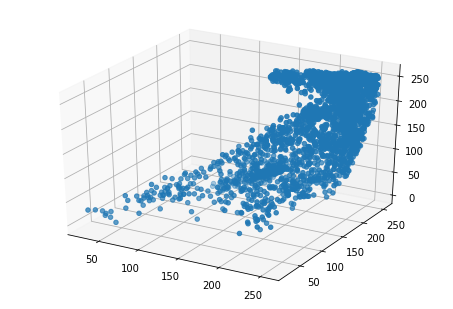

In [45]:
plt.show()

In [46]:
len(np.unique(v))

244

In [47]:
X = v

In [48]:
range_n_clusters = [2,3,4,5,6,7]

In [49]:
print("a")

a


2
クラスタ数: 2
[0 0 0 ..., 1 1 1]
クラスタ数 2 平均silhouette-score: 0.546950453029


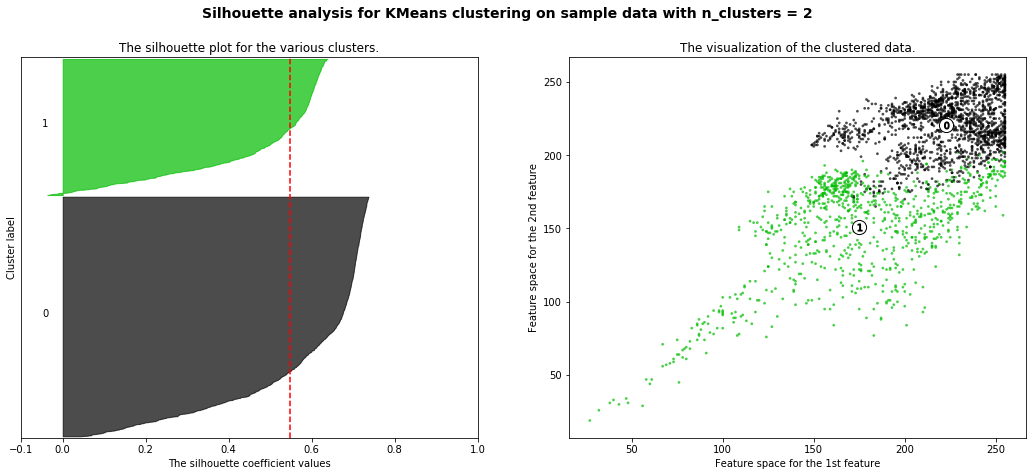

3
クラスタ数: 3
[2 2 2 ..., 0 0 0]
クラスタ数 3 平均silhouette-score: 0.455534116291


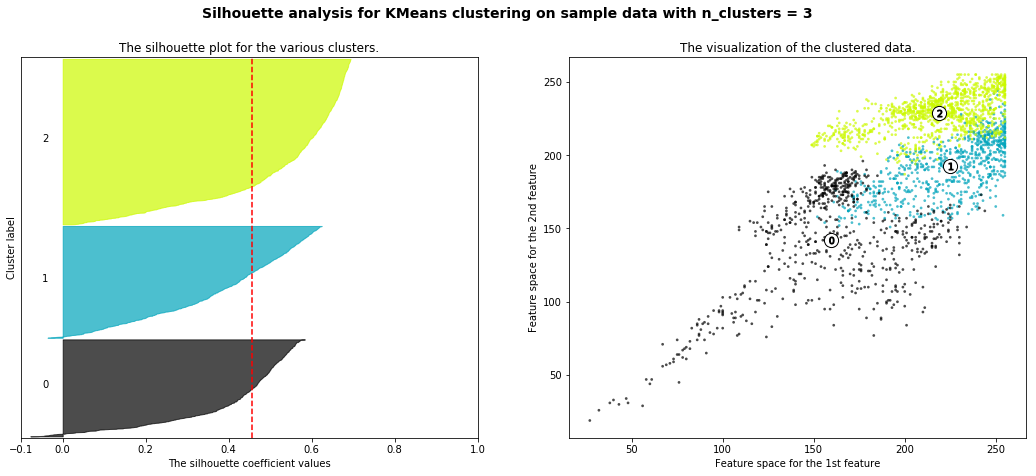

4
クラスタ数: 4
[2 2 2 ..., 0 0 0]
クラスタ数 4 平均silhouette-score: 0.416362171703


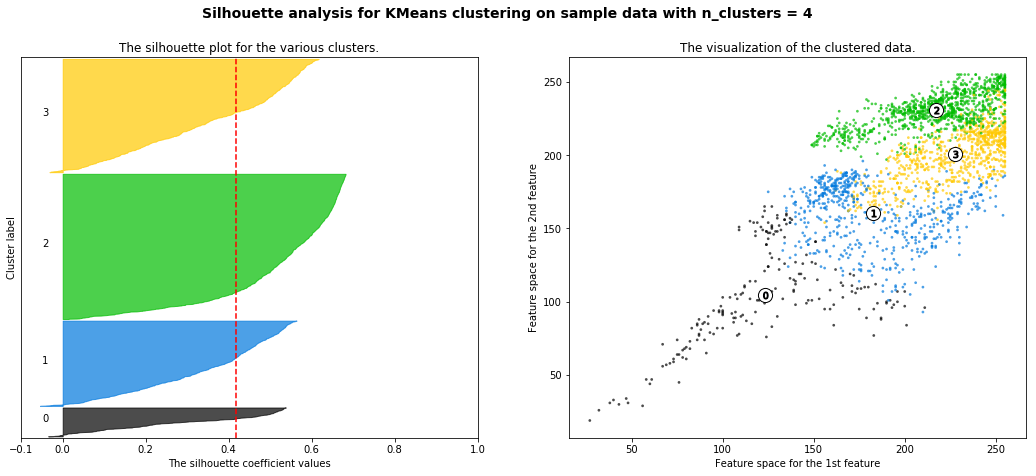

5
クラスタ数: 5
[1 1 1 ..., 2 2 2]
クラスタ数 5 平均silhouette-score: 0.376415289028


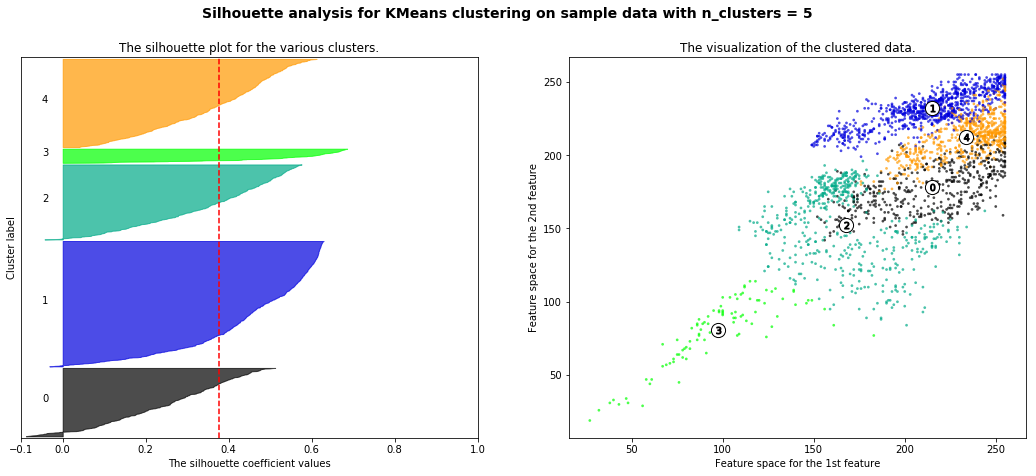

6
クラスタ数: 6
[2 2 2 ..., 1 1 1]
クラスタ数 6 平均silhouette-score: 0.347172727633


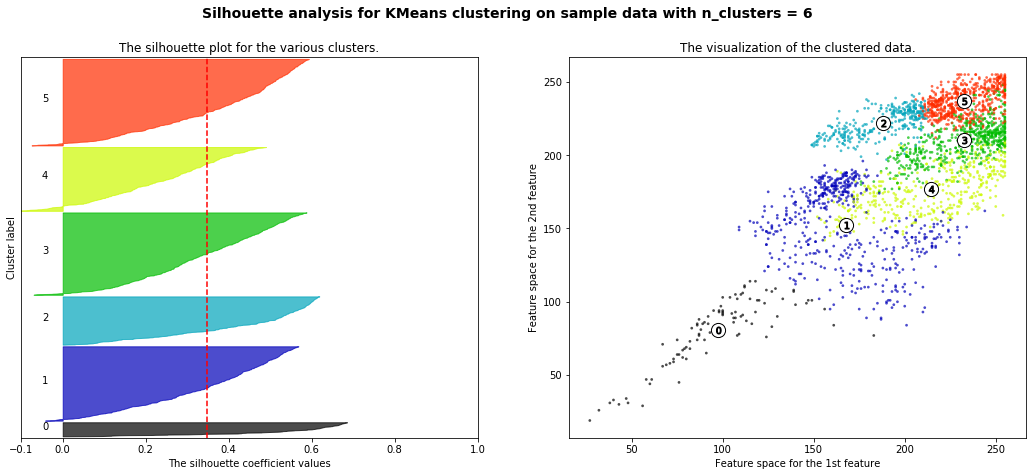

7
クラスタ数: 7
[3 3 3 ..., 5 5 5]
クラスタ数 7 平均silhouette-score: 0.36758473775


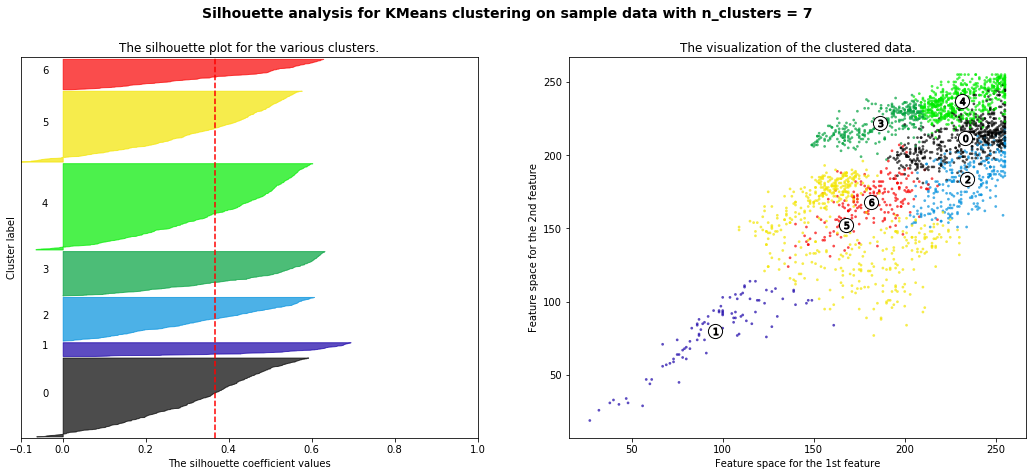

In [50]:
for n_clusters in range_n_clusters:
    print(n_clusters)
    # モデルの宣言
    km = KMeans(n_clusters=n_clusters,#クラスタ数
            init='random',#セントロイドの初期値をランダムに選択
            n_init=10,#異なるセントロイドの初期値を用いたk-meansアルゴリズム
            max_iter=100,#k-meansアルゴリズムの内部イテレーション回数
            tol=1e-04,#収束と判定するための相対的な許容誤差
            random_state=0#セントロイドの初期値に用いる乱数生成器の状態
            )
    km.fit(X)
    print("クラスタ数: {}".format(n_clusters))
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    #clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = km.labels_
    print(cluster_labels)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("クラスタ数", n_clusters,
          "平均silhouette-score:", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = km.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()